In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="darkgrid")

In [8]:
all_data = pd.read_csv("F:/data science/brain stroke prediction/data.csv")

In [9]:
all_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [10]:
target = 'stroke'
X = all_data.loc[:,all_data.columns!=target]
y = all_data.loc[:,all_data.columns==target]

In [11]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
X = pd.get_dummies(X[columns])

0    4733
1     248
Name: stroke, dtype: int64


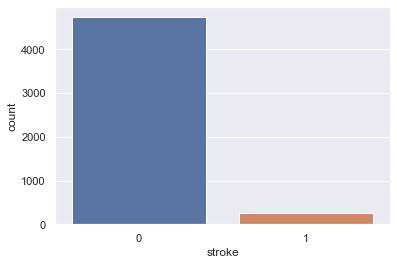

In [12]:
ax = sns.countplot(x=target,data=all_data)
print(all_data[target].value_counts())

**There is an oversampling in the dataset. There is a big difference between those who do not have a stroke and those who do.**

In [13]:
percentage_no_stroke = 100*(4733/float(all_data.shape[0]))
percentage_no_stroke

95.0210801043967

In [14]:
percentage_yes_stroke = 100*(248/float(all_data.shape[0]))
percentage_yes_stroke

4.978919895603292

In [18]:
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

1    4733
0    4733
Name: stroke, dtype: int64


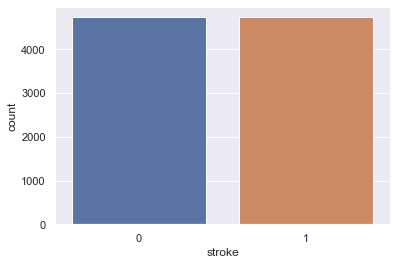

In [19]:
ax = sns.countplot(x=target,data=y)
print(y[target].value_counts())

# Now we have a balanced dataset

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20, shuffle=True)

# MODEL BUILDING

**RANDOM FOREST**

In [21]:
from sklearn.ensemble import RandomForestClassifier

def rf(X_train, Y_train, n_estimators=250):
 rndforest = RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1)
 rndforest.fit(X_train, Y_train)
 return rndforest

In [22]:
random_forest_en = rf(X_train,Y_train.values.ravel(), n_estimators=250)

In [23]:
print("TRAINING ACCURACY:", random_forest_en.score(X_train, Y_train))
print("VALIDATION ACCURACY", random_forest_en.score(X_test, Y_test))

TRAINING ACCURACY: 1.0
VALIDATION ACCURACY 0.9714889123548046


In [24]:
from matplotlib import pyplot as plt

In [25]:
import itertools
def plot_confusion_matrix(model, X, y, class_names, file_name,
                          normalize=False,
                          title='CONFUSION MATRIX',
                          cmap=plt.cm.Greys):
    y_pred = model.predict(X)
    # Compute confusion matrix
    cnf_matrix  = confusion_matrix(y, y_pred)
    np.set_printoptions(precision=1)
    plt.figure(figsize=(18, 16))

    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("CONFUSION MATRIX")
    else:
        print('CONFUSION MATRIX')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    plt.title('CONFUSION MATRIX')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.ylabel('CLASS')
    plt.xlabel('PREDICTED CLASS')
    plt.tight_layout()
    plt.savefig(file_name+'.png')
    plt.show()

# TRAIN CONFUSION MATRIX

CONFUSION MATRIX


C:\Users\VINUTHA\AppData\Local\Temp\ipykernel_4076\1605104652.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


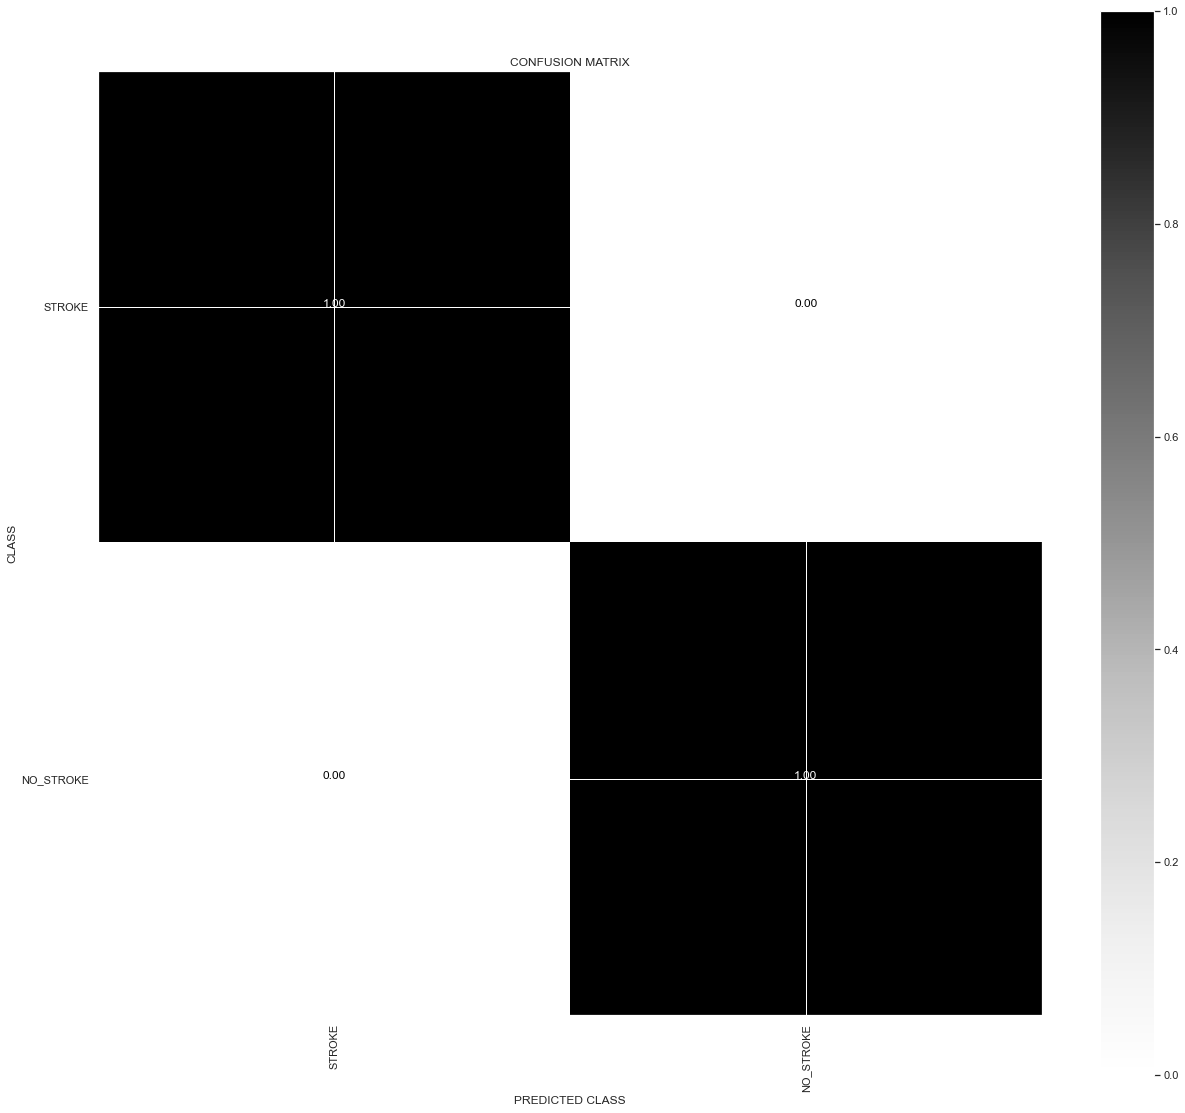

In [26]:
from sklearn.metrics import confusion_matrix

LABELS = ['STROKE', 'NO_STROKE']
plot_confusion_matrix(random_forest_en, X_train, Y_train, class_names=LABELS, file_name='ConfussionMatrix', normalize=True)

# TTEST CONFUSION MATRIX

CONFUSION MATRIX


C:\Users\VINUTHA\AppData\Local\Temp\ipykernel_4076\1605104652.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


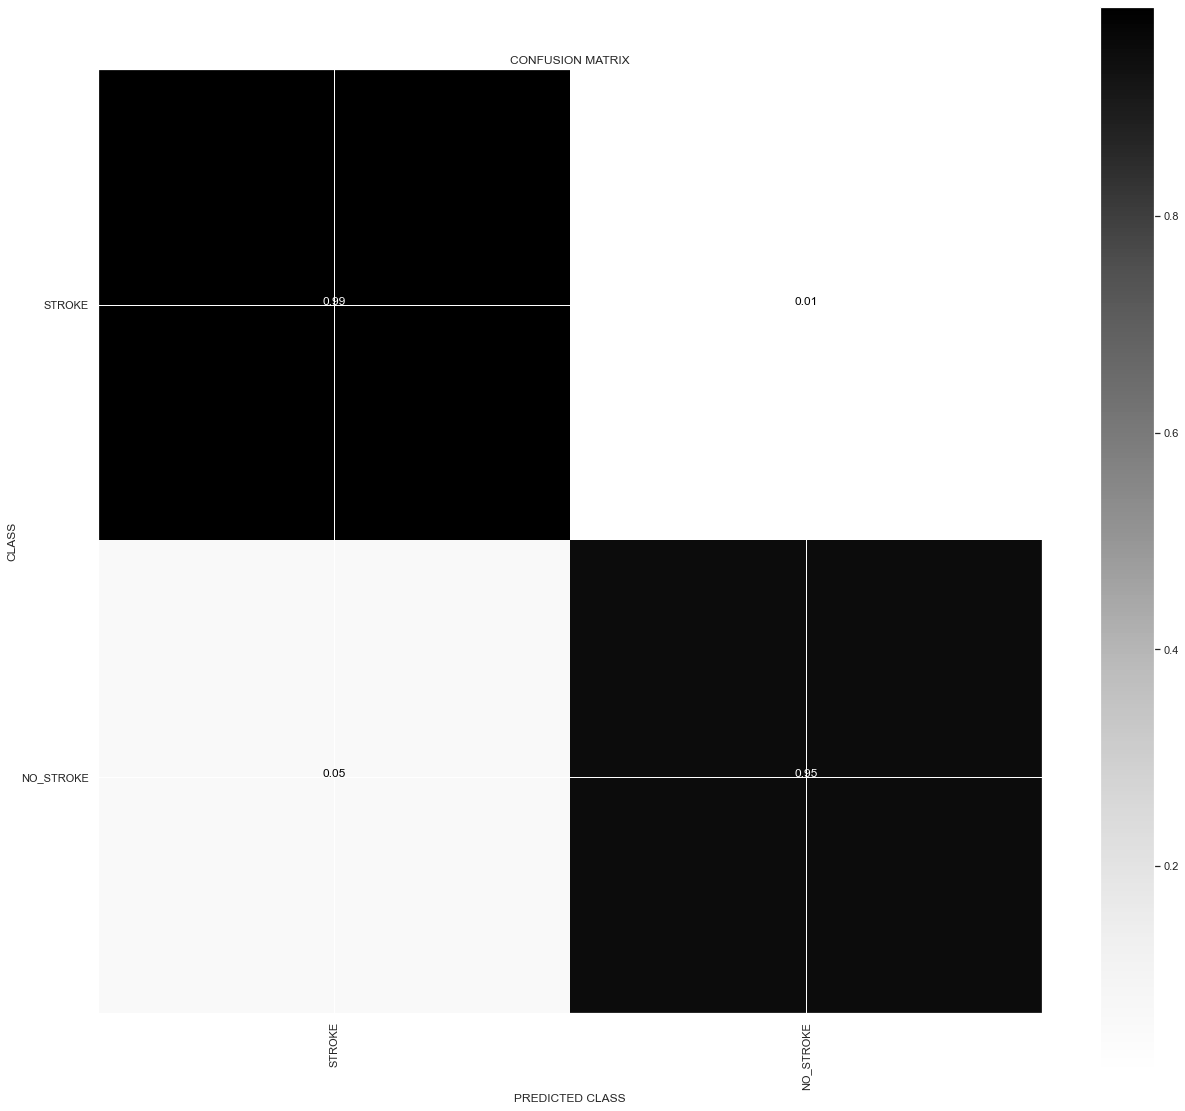

In [27]:
plot_confusion_matrix(random_forest_en, X_test, Y_test, class_names=LABELS, file_name='ConfussionMatrix', normalize=True)